In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2]:
# загружаем датасет
boston = datasets.load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
print(boston.DESCR)
bostonDF

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


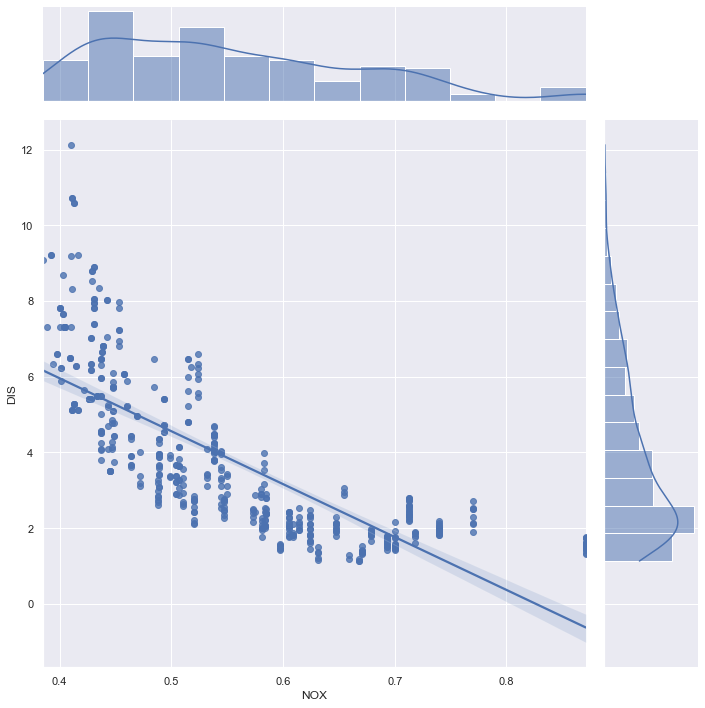

In [42]:
#sns.set()
#plt.figure(figsize=(100,20))
sns.jointplot(x='NOX', y='DIS', data=bostonDF, kind='reg', size=10)

<AxesSubplot:>

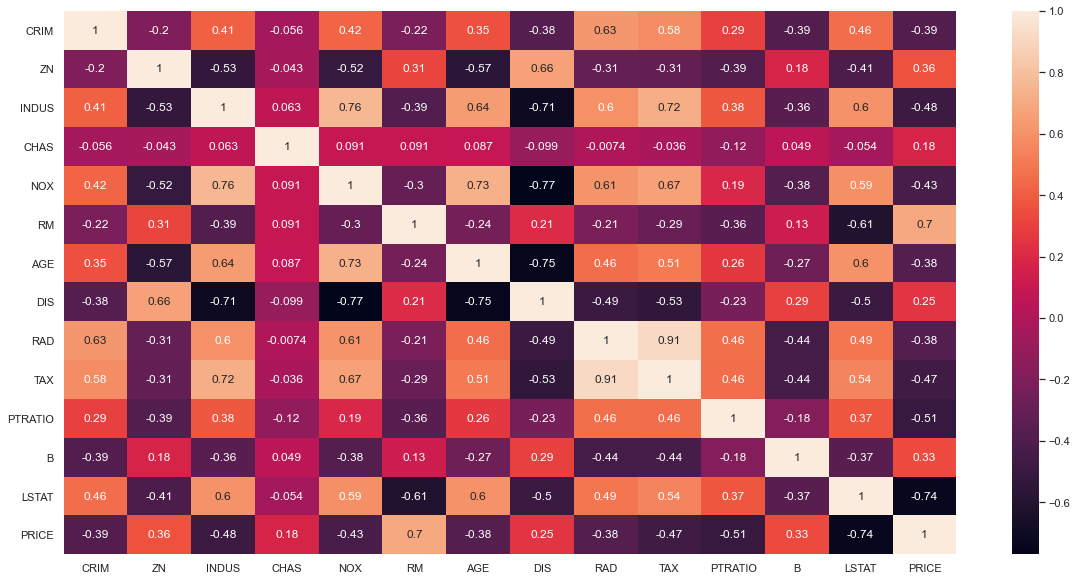

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(bostonDF.corr(),annot=True)

<AxesSubplot:>

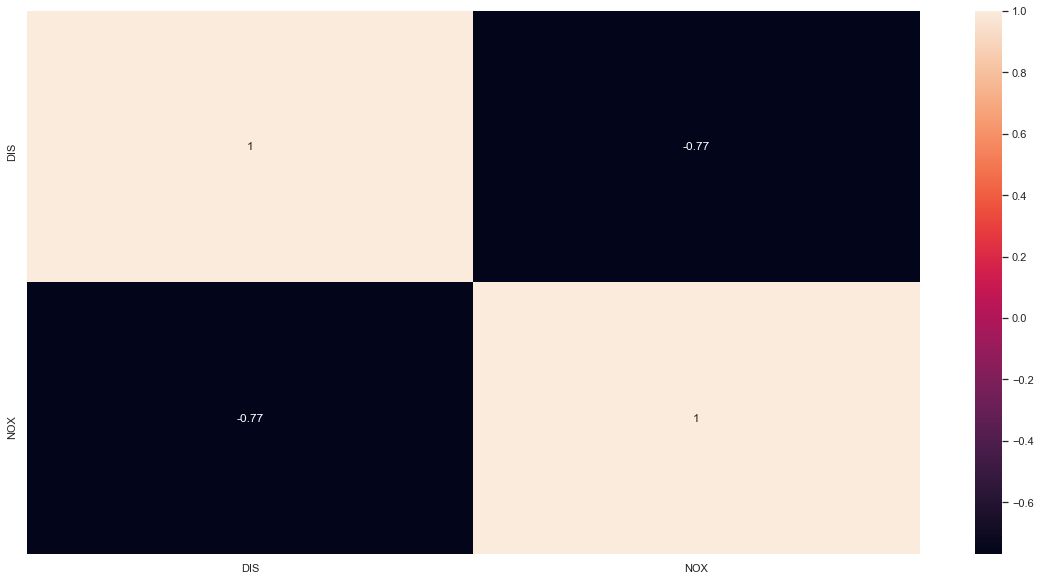

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(bostonDF[['DIS','NOX']].corr(), annot=True)

In [34]:
A = np.array(bostonDF[['NOX','DIS']].corr())
print(A)
np.linalg.eig(A)

[[ 1.         -0.76923011]
 [-0.76923011  1.        ]]


(array([1.76923011, 0.23076989]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [37]:
A = np.array(bostonDF[['DIS','CHAS']].corr())
print(A)
np.linalg.eig(A)

[[ 1.         -0.09917578]
 [-0.09917578  1.        ]]


(array([1.09917578, 0.90082422]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [45]:
A = np.array([[1,0.8],[0.8,1]])
print(A)
np.linalg.eig(A)

[[1.  0.8]
 [0.8 1. ]]


(array([1.8, 0.2]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [71]:
x1 = np.array([1,2,1,1])
x2 =np.array([70,130,65,60])
A=np.stack((x1,x2), axis=1)
#A
B = pd.DataFrame(A).corr()
#B
np.linalg.eig(B)

(array([1.99220261, 0.00779739]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [64]:
x1_c = x1 - x1.mean()
x2_c = x2 - x2.mean()
x1_st = x1_c/np.linalg.norm(x1_c)
x2_st = x2_c/np.linalg.norm(x2_c)
new_factor = x1_st+x2_st
new_factor_st = new_factor/np.linalg.norm(new_factor)
new_factor_st

array([-0.24396044,  0.86433557, -0.28811186, -0.33226327])